In [1]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus
from pydotplus import graph_from_dot_data
import pandas as pd
from sklearn.datasets import load_iris


from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sn

In [2]:
#charge dataset
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
# Class 0 is Iris-setosa, Class 1 is Iris-Versicolor. 

In [3]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [4]:
print (df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target  
0         0  

In [5]:
#divide dataset into train and test
X_train, X_test, Y_train, Y_test = train_test_split(df[data.feature_names], df['target'],test_size=0.2, random_state=0)

**TRAINING THE ALGORITHM**

In [6]:
#Create and train a decision tree to classify data of Iris
CLF2 = tree.DecisionTreeClassifier(max_depth=2, random_state=42)

To achieve deterministic behavior during fitting, random_state must be set to an integer. It controls the randomness of the estimator.

Features are always randomly permuted at each split, even if the splitter is set to "best".

When max_features is None, then max_features = n_features. With n_features, the algorithm will randomly select max_features at each split before finding the best split among them. However, the best split found may vary between different runs, even if max_features = n_features. That is the case if the improvement of the criterion is identical for several splits and one split must be selected at random.


In [7]:
CLF2.fit(X_train, Y_train) 
y_pred = CLF2.predict(X_test)
# we use predict function to obtain predictions
print(CLF2.predict(X_test) )

[2 1 0 2 0 2 0 1 1 1 1 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]


[Text(0.4, 0.8333333333333334, 'x[2] <= 2.35\ngini = 0.665\nsamples = 120\nvalue = [39, 37, 44]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(0.6, 0.5, 'x[3] <= 1.75\ngini = 0.496\nsamples = 81\nvalue = [0, 37, 44]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.18\nsamples = 40\nvalue = [0, 36, 4]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.048\nsamples = 41\nvalue = [0, 1, 40]')]

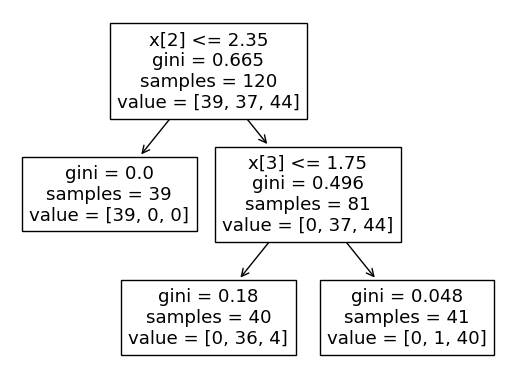

In [8]:
tree.plot_tree(CLF2)

The tree diagram can be saved to a file as a PNG image.

In [9]:
dot_data = export_graphviz(CLF2,
                         class_names = ['Iris-Setosa', 'Iris-Versicolor', 'Iris-Virginica'] ,
                filled = True, rounded = True,
                special_characters = True)
graph = graph_from_dot_data(dot_data)
graph.write_png('arbol_profundidad_2.png')

True

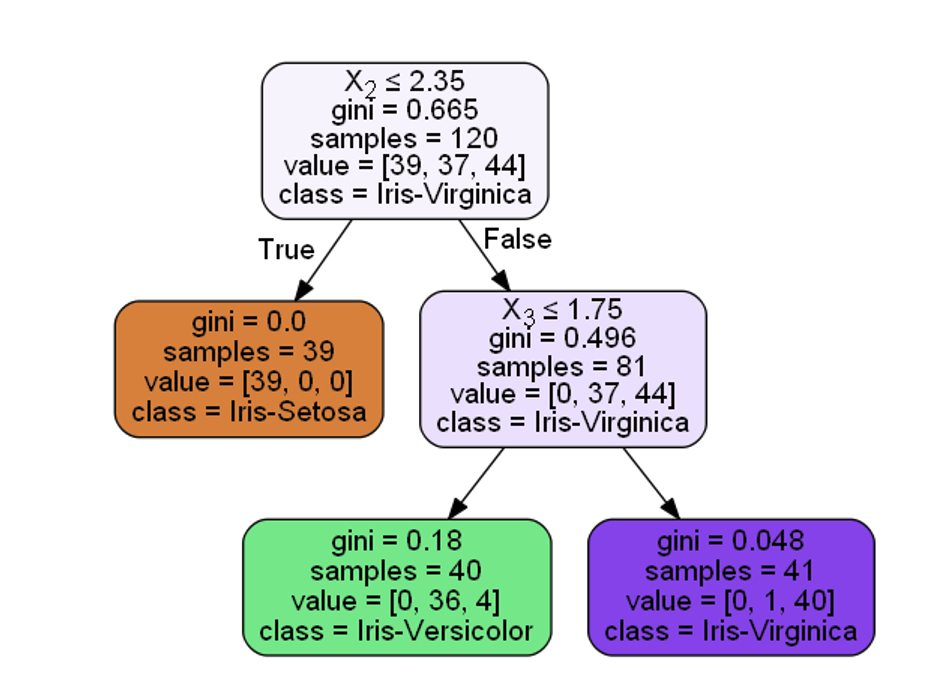

How do we Interpret? -
If the length of the petal is less than 2.35 centimeters, then the iris flower belongs to the setosa variety. If the length of the petal is greater than 2.35 centimeters, we compare the width of the petal.

When the width of the petal is less than or equal to 1.75 centimeters, it belongs to the versicolor variety with a 90% probability. If it would be virginica with a 97% probability.

P(versicolor) = P(36)/P(40)

P(virginica) = P(40)/P(41)

In decision trees, we have the option within scikit-learn to calculate the feature importance, which is the total amount by which the Gini index decreases due to splits on a particular feature.

Scikit-learn generates a number between 0 and 1 for each feature. We are calling features_importances within the decision tree library (clf).

All important features are normalized to sum up to 1.

In this example, the width of the petal has the highest feature importance weight.

In [11]:
import numpy as np

In [13]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(CLF2.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)

In [15]:
print(importances)
#X3 - PETAL WIDTH
#x2 - PETAL LENGHT
#x1 - SEPAL WIDTH
#x0 - SEPAL LENGHT

             feature  importance
2  petal length (cm)        0.56
3   petal width (cm)        0.44
0  sepal length (cm)        0.00
1   sepal width (cm)        0.00


**CONFUSION MATRIX FOR WIDTH 2**

The class 0 is Iris-Setosa, class 1 is Iris-Versicolor, and class 2 is Iris-Virginica

In [17]:
import matplotlib.pyplot as plt


Matriz de Confusión:


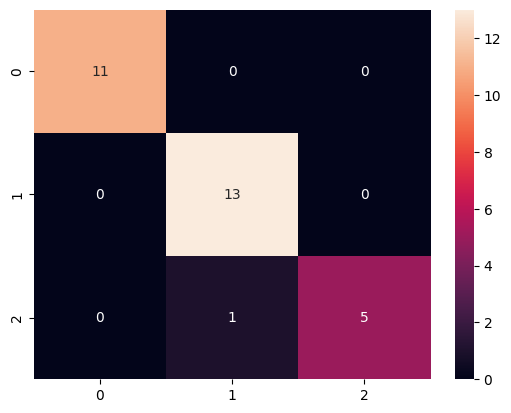

[[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]


In [19]:
matriz = confusion_matrix(Y_test, y_pred)
print('Matriz de Confusión:')

sn.heatmap(matriz, annot=True)
plt.show()
print(matriz)

The metrics derived from the Confusion Matrix are missing

So I'm going to investigate a bit if changing the tree's depth I get better values for the confusion matrix - I'm going to try up to a depth of 5.

Confusion matrix for depth 1


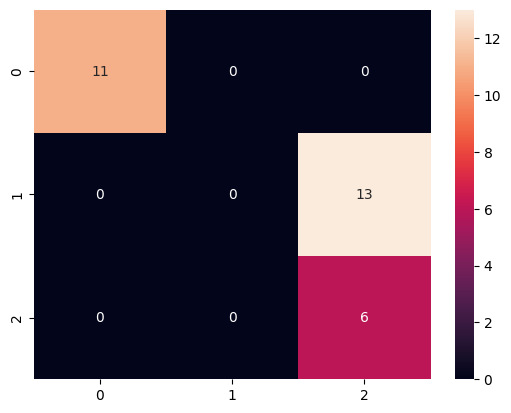

acuracy: 0.5666666666666667
precision: 0.4298245614035088
recall 0.5666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.00      0.00      0.00        13
           2       0.32      1.00      0.48         6

    accuracy                           0.57        30
   macro avg       0.44      0.67      0.49        30
weighted avg       0.43      0.57      0.46        30

Confusion matrix for depth 2


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

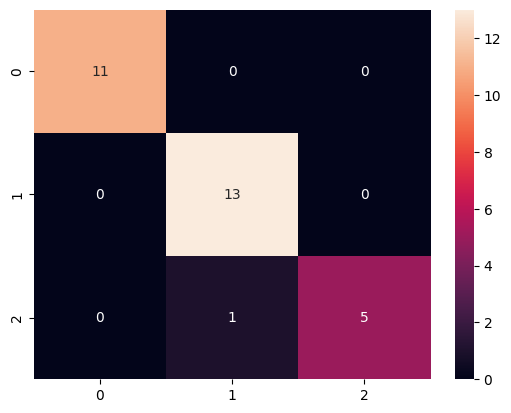

acuracy: 0.9666666666666667
precision: 0.9690476190476189
recall 0.9666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.93      1.00      0.96        13
           2       1.00      0.83      0.91         6

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30

Confusion matrix for depth 3


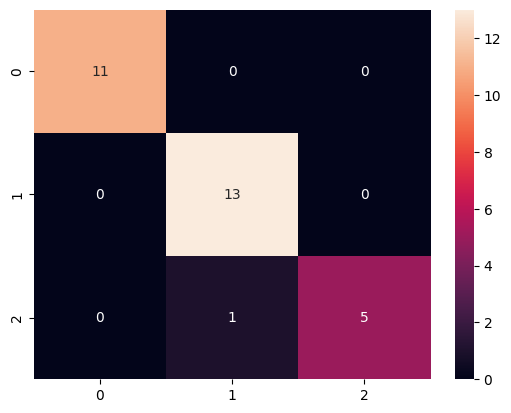

acuracy: 0.9666666666666667
precision: 0.9690476190476189
recall 0.9666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.93      1.00      0.96        13
           2       1.00      0.83      0.91         6

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30

Confusion matrix for depth 4


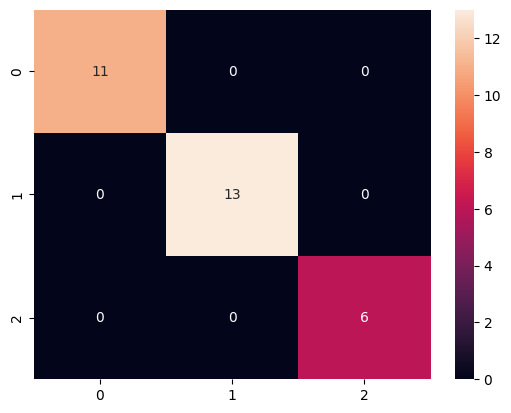

acuracy: 1.0
precision: 1.0
recall 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion matrix for depth 5


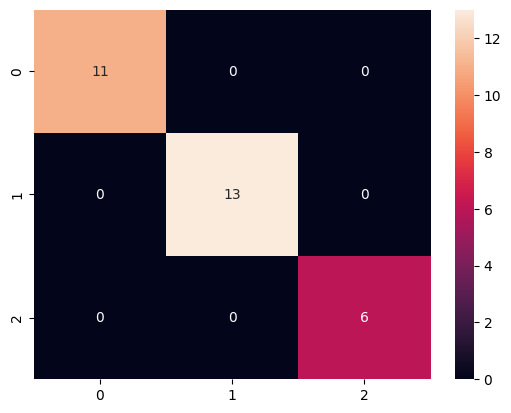

acuracy: 1.0
precision: 1.0
recall 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [21]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score


max_depth_range = list(range(1, 6))# List to store the average RMSE for each value of max_depth:
accuracy = []
for depth in max_depth_range:
    clf = DecisionTreeClassifier(max_depth = depth, 
                             random_state = 0)
    clf.fit(X_train, Y_train)    
    y_pred = clf.predict(X_test)
    matriz = confusion_matrix(Y_test, y_pred)
    print('Confusion matrix for depth',depth)
    sn.heatmap(matriz, annot=True)
    plt.show()

    print("acuracy:", accuracy_score(Y_test, y_pred))
    #precision score
    print("precision:", precision_score(Y_test, y_pred,average='weighted'))
    #recall score
    print("recall" , metrics.recall_score(Y_test,y_pred,average='weighted'))
    print(metrics.classification_report(Y_test, y_pred))

Try with depth 5


In [22]:
CLF5 = tree.DecisionTreeClassifier(max_depth=5, random_state=42)

In [23]:
CLF5.fit(X_train, Y_train) # train tree
y_pred = CLF5.predict(X_test)
# we can use predict method to obtain predictions
print(CLF5.predict(X_test) )

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]


[Text(0.5, 0.9166666666666666, 'x[2] <= 2.35\ngini = 0.665\nsamples = 120\nvalue = [39, 37, 44]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\ngini = 0.496\nsamples = 81\nvalue = [0, 37, 44]'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.18\nsamples = 40\nvalue = [0, 36, 4]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\ngini = 0.056\nsamples = 35\nvalue = [0, 34, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 34\nvalue = [0, 34, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.48\nsamples = 5\nvalue = [0, 2, 3]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.5384615384615384, 0.25, 'x[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846156, 0.08333333333333333, 'gini 

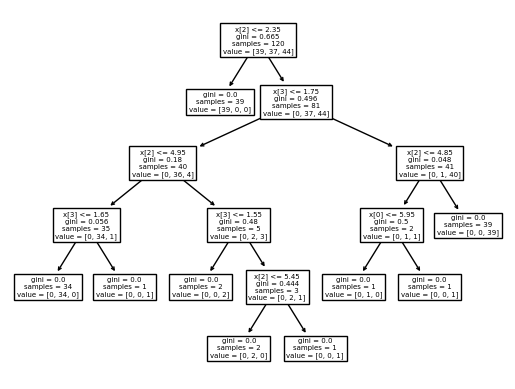

In [24]:
tree.plot_tree(CLF5)

In [25]:
#Visualize in an archive
dot_data = export_graphviz(CLF5,
                           class_names = ['Iris-Setosa', 'Iris-Versicolor', 'Iris-Virginica'] ,
                filled = True, rounded = True,
                special_characters = True)
graph = graph_from_dot_data(dot_data)
graph.write_png('arbol_produndidad_5.png')

True

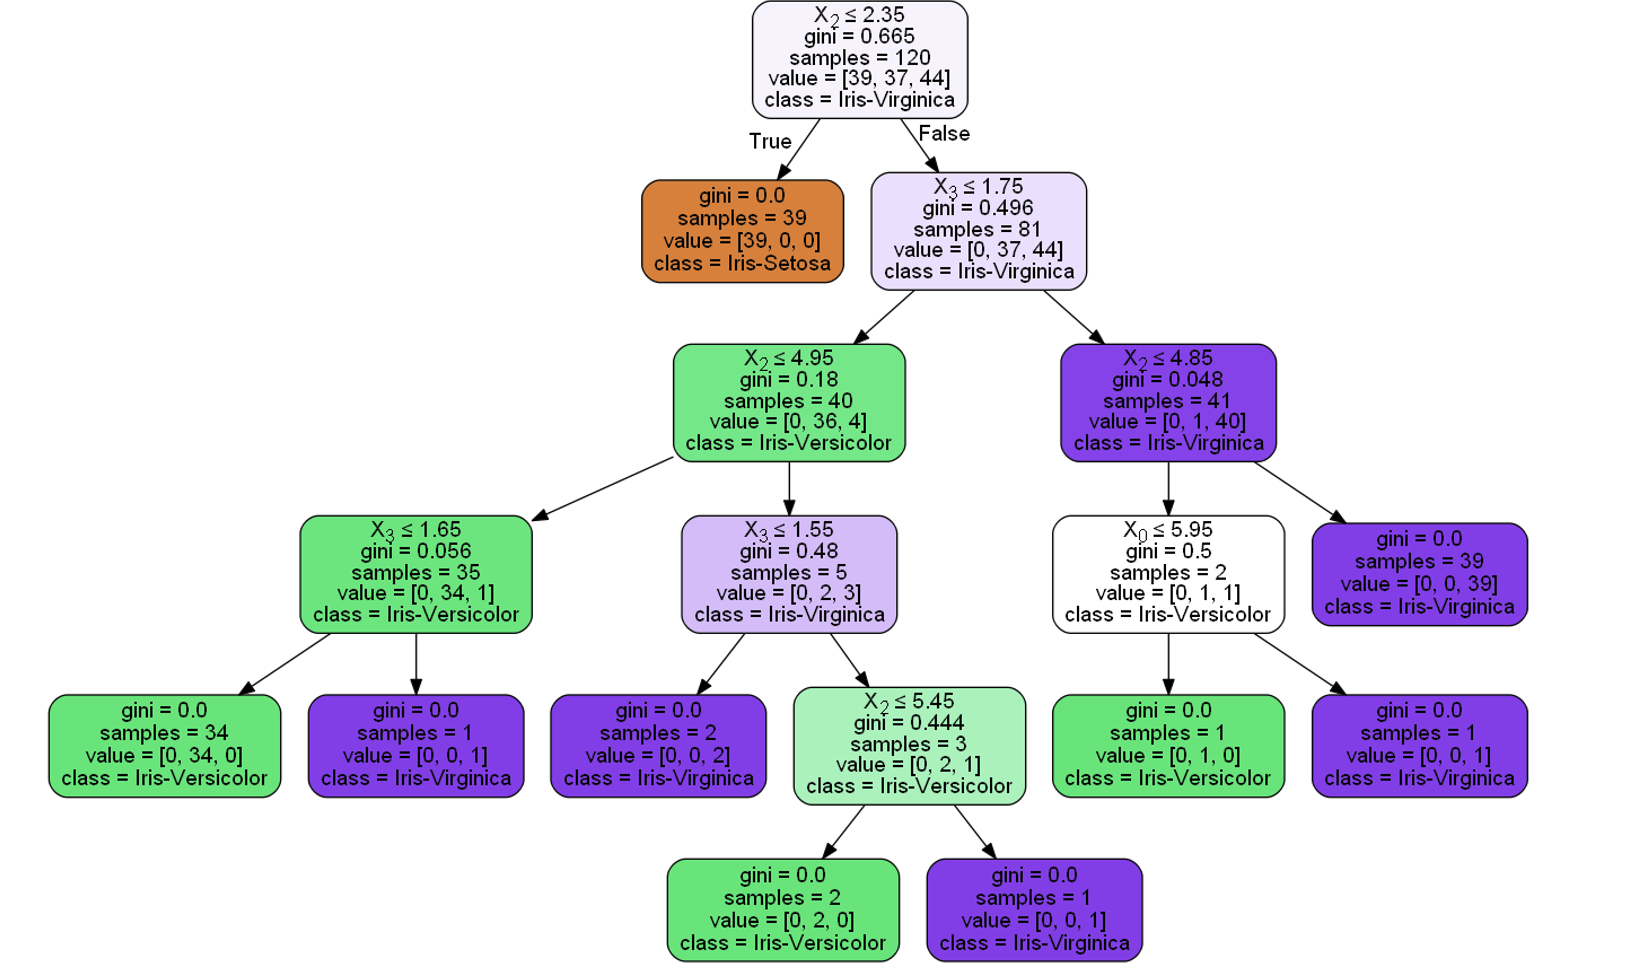

The information for each node is as follows:

condition: a node where some decision is made.

gini: a measure of impurity. Used by the CART (Classification and Regression Trees) algorithm, Gini impurity is a measure of how often a randomly chosen element from the set would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the subset. Gini impurity can be calculated by summing the probability of each chosen element multiplied by the probability of an error in categorizing that element. It reaches its minimum (zero) when all cases in the node correspond to a single target category.

samples: number of samples that meet the conditions required to reach this node.

value: how many samples of each class reach this node.

class: which class is assigned to the samples that reach this node.

What do we have as selection measures?

**Information Gain**
Information gain is a statistical property that measures how well a given attribute separates the training examples according to their target classification.

Looking at the images below, we can say that C requires less information to be defined in a node, followed by set B, and then set A requires the most information.
In other words, the purest node is C, followed by B, and then A.
  

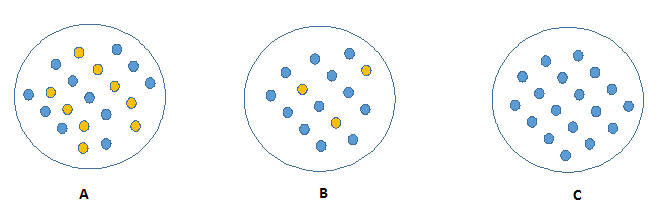

Conclusion: We can say that a purer node requires less information, and a more impure node requires more information for its description.

Gain Ratio

We can think that an attribute with low information gain divides the data relatively uniformly and, as a result, does not bring us closer to a decision.

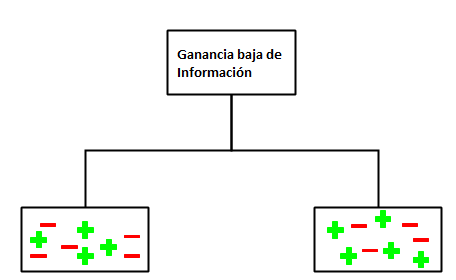

On the other hand, an attribute with high information gain divides the data into groups with an unequal number of positives and negatives and, as a result, helps to separate them from each other.

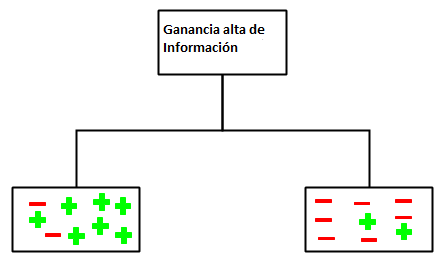

To calculate information gain, we rely on the concept of Entropy.

The concept of entropy measures the impurity of the input set.

Information gain is a decrease in entropy.
Entropy is 1 when the sample contains an equal number of positive and negative elements. If the sample contains an unequal number of positive and negative examples, entropy is between 0 and 1.

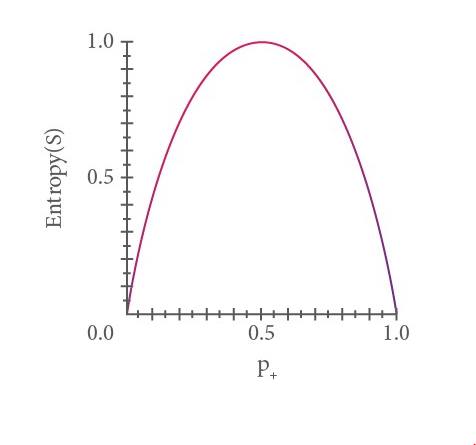

We can calculate entropy like this:


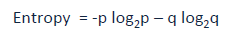

where p and q are the probability of success and failure in that node.

Information gain calculates the difference between the entropy before the split and the average entropy after the split of the dataset based on the given attribute values.

Information Gain = Entropy (parent node) - [Avg Entropy(child node)]

Gini Index

The Gini index states that if we select two items from a population at random, then they should be of the same class, and the probability of this happening is 1 if the population is pure.

It works with the categorical target variable “Success” or “Failure”.

It performs only binary splits.

The higher the Gini value, the greater the inequality. The closer to zero the Gini index is, the lesser the inequality.

The Classification and Regression Tree (CART) uses the Gini method to create binary splits.


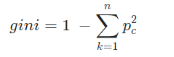